Zadanie1: Czy jest możliwe żeby dwie pierwsze komponenty objaśniały 100% wariancji danych 50D? Jeśli nie - udowodnij, jeśli tak - podaj przykład.

Tak. Pierwszy główny składnik po zmniejszeniu zachowuje swoje (maksymalne) właściwości, które były obecne przed zmniejszeniem, dlatego dwie pierwsze komponenty mogą odzwierciedlić 100% danych 50D.

Zadanie2: Rozważ dane . Dokonaj standaryzacji a następnie przeprowadź algorytm PCA. Która z cech wydaje się najistoniejsza? Ile komponentów wystarczająco dobrze opisuje te dane? Skomentuj otrzymane wyniki.

In [20]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
iris = datasets.load_iris()

In [22]:
pca = PCA(2)
iris2 = pca.fit_transform(iris.data)
print(iris.data.shape) #ustandaryzowane wcześniej do 4 wartości

(150, 4)


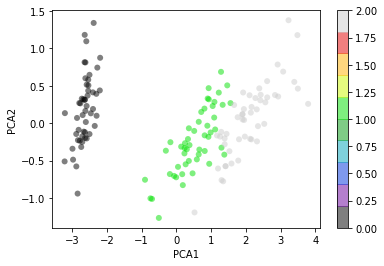

In [23]:
plt.scatter(iris2[:,0], iris2[:,1],
            c = iris.target, edgecolor = "none", alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral',10))

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

In [24]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.75393989, 0.2149393 , 0.02603828, 0.00508252])

In [25]:
print(pca.components_[:4])

[[ 0.52169346 -0.29813762  0.57098306  0.5593999 ]
 [ 0.38146649  0.91911406  0.0459712   0.087174  ]
 [ 0.71013276 -0.22635086 -0.12553774 -0.65476487]
 [-0.27933979  0.122917    0.81000325 -0.50075485]]


Najistotniejsza jest pierwsza cecha, opisuje ponad 72% danych. Pierwsze dwie komponenty opisują około 90% danych.

Zadanie3: Rozważ jeszcze raz dane dotyczące twarzy różnych osób (fetch_lw_people) rozważane podczas ćwiczenia z SVM. Zastosuj podobnie jak wtedy PCA ze 150 komponentnami. Jaki procent wariancji opisują te komponenty? Narsuj kilka początkowych komponentów (wektory własne); oczywiście podobnie jak obrazy są to wektory  wymiarowe - przed narysowaniem należy jeszcze zastosować metodę reshape. Zastanów się nad ich interpretacją.

In [1]:
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [17]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
n_components = 150

t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [19]:
t0 = time()
param_grid = {
    "C": [1, 5, 10, 50], #ja sobie wzięłam to na podstawie parametrów jeszcze z tym co na zajęciach robiliśmy (ćw.3)
    "gamma": [0.0001, 0.0005, 0.001, 0.005],
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)

In [6]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
   
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


In [13]:
t0 = time()
y_pred = clf.predict(X_test_pca)

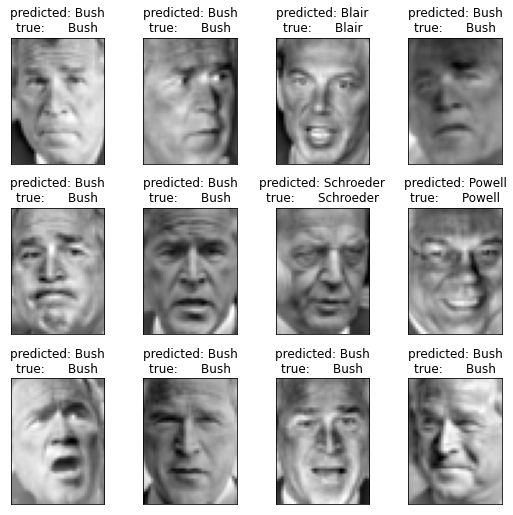

In [9]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

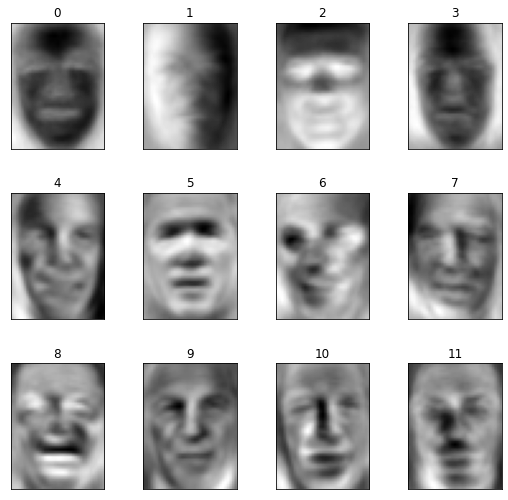

In [15]:
eigenface_titles = [i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

Zadanie4: Zauważ, że wykresy te różnią się zakresem wartości - czy to zrozumiałe?

Są inne ze względu na różnice w częstotliwościach względem amplitudy. Algorytm PCA nie widzi danych, które były na wejściu. Po zastosowaniu go nie widać gdzie nastąpiły przekształcenia.